In [93]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as mplt

def attack_latency(filename):
    log = pd.read_csv(
        filename, 
        header=None,
        usecols=[0, 7],
        names=['timestamp', 'latency'],
        sep='\s+'
    )

    log['timestamp'] = pd.to_datetime(log['timestamp'].replace(r'^\[(\d+\.?\d*)\]$', r'\1', regex=True), unit='s')
    log['latency'] = log['latency'].replace(r'time=(\d+\.?\d*)', r'\1', regex=True).apply(pd.to_numeric)
    log['time_diff'] = (log['timestamp'] - log['timestamp'][0]).astype('timedelta64[s]')
    return log

def latency_graph(dataset, title, color):
    plt = dataset.plot(
        x='time_diff', y='latency',
        title=title, grid=True, legend=False, color=color
    )
    plt.set_xlabel('Čas [s]')
    plt.set_ylabel('Latencia [ms]')
    

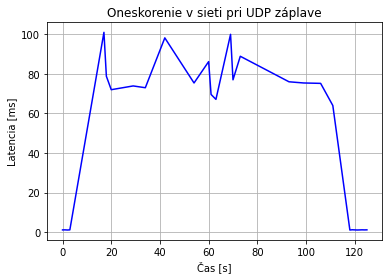

In [90]:
udp_flood = attack_latency('slowhttptest/udp-flood-ping.txt')
latency_graph(udp_flood, 'Oneskorenie v sieti pri UDP záplave', color='blue')

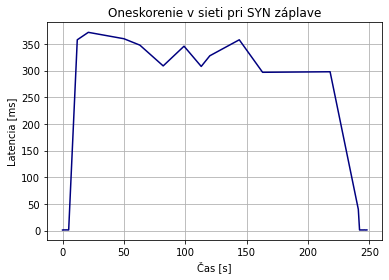

In [89]:
syn_flood = attack_latency('slowhttptest/syn-flood-ping.txt')
latency_graph(syn_flood, 'Oneskorenie v sieti pri SYN záplave', color='navy')

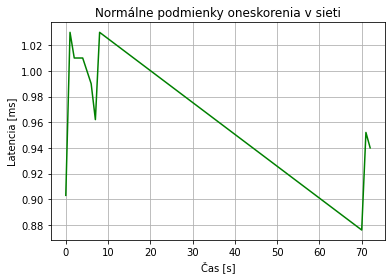

In [91]:
no = attack_latency('slowhttptest/no-flood.txt')
latency_graph(no, 'Normálne podmienky oneskorenia v sieti', 'green')

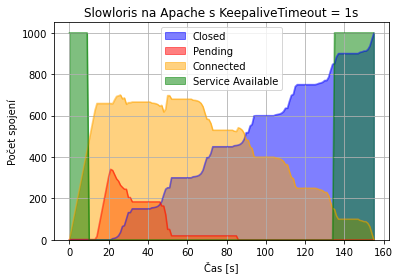

In [132]:
def slowhttptest_graph(filename, title):
    dataset = pd.read_csv(filename)
    plt = dataset.plot(
            x='Seconds', y=['Closed', 'Pending', 'Connected', 'Service Available'],
            title=title, grid=True, kind='area', stacked=False, color=['blue', 'red', 'orange', 'green']
        )
    plt.set_xlabel('Čas [s]')
    plt.set_ylabel('Počet spojení')
    
slowhttptest_graph('slowhttptest/apache_1s.csv', 'Slowloris na Apache s KeepaliveTimeout = 1s')

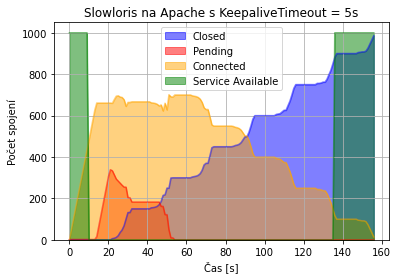

In [133]:
slowhttptest_graph('slowhttptest/apache_5s.csv', 'Slowloris na Apache s KeepaliveTimeout = 5s')

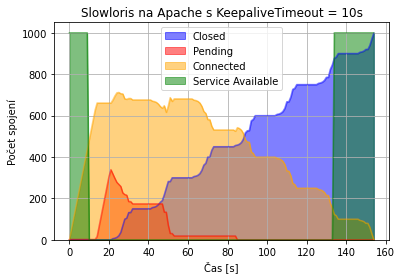

In [134]:
slowhttptest_graph('slowhttptest/apache_10s.csv', 'Slowloris na Apache s KeepaliveTimeout = 10s')

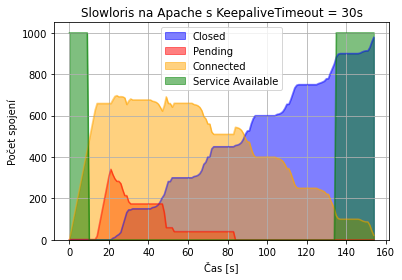

In [135]:
slowhttptest_graph('slowhttptest/apache_30s.csv', 'Slowloris na Apache s KeepaliveTimeout = 30s')

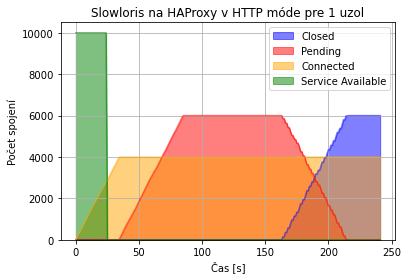

In [136]:
slowhttptest_graph('slowhttptest/haproxy_1_roundrobin.csv', 'Slowloris na HAProxy v HTTP móde pre 1 uzol')

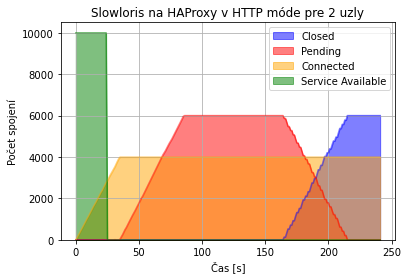

In [137]:
slowhttptest_graph('slowhttptest/haproxy_2_roundrobin.csv', 'Slowloris na HAProxy v HTTP móde pre 2 uzly')

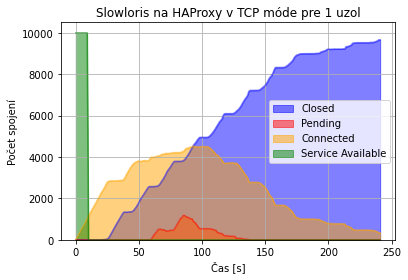

In [107]:
slowhttptest_graph('slowhttptest/haproxy_1_tcp_roundrobin.csv', 'Slowloris na HAProxy v TCP móde pre 1 uzol')

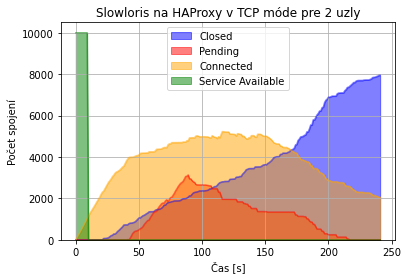

In [113]:
slowhttptest_graph('slowhttptest/haproxy_2_tcp_roundrobin.csv', 'Slowloris na HAProxy v TCP móde pre 2 uzly')

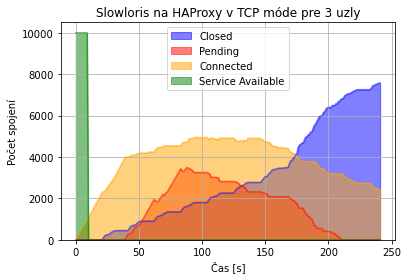

In [114]:
slowhttptest_graph('slowhttptest/haproxy_3_tcp_roundrobin.csv', 'Slowloris na HAProxy v TCP móde pre 3 uzly')

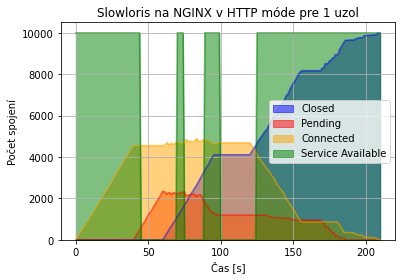

In [115]:
slowhttptest_graph('slowhttptest/nginx_http_1roundrobin.csv', 'Slowloris na NGINX v HTTP móde pre 1 uzol')

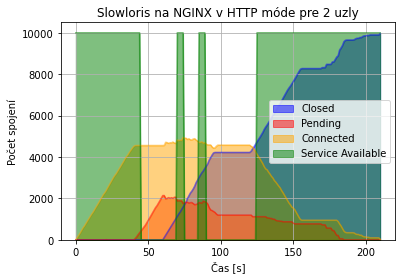

In [117]:
slowhttptest_graph('slowhttptest/nginx_http_2roundrobin.csv', 'Slowloris na NGINX v HTTP móde pre 2 uzly')

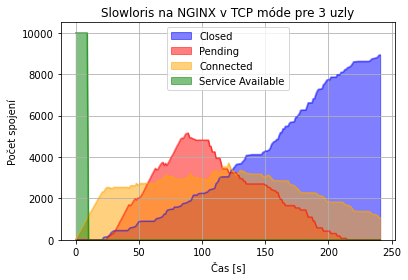

In [138]:
slowhttptest_graph('slowhttptest/nginx_tcp3roundrobin.csv', 'Slowloris na NGINX v TCP móde pre 3 uzly')

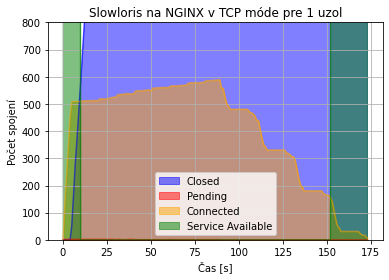

In [139]:
def slowhttptest_graph(filename, title):
    dataset = pd.read_csv(filename)
    plt = dataset.plot(
            x='Seconds', y=['Closed', 'Pending', 'Connected', 'Service Available'],
            title=title, grid=True, kind='area', stacked=False, color=['blue', 'red', 'orange', 'green'],
            ylim=(0, 800)
        )
    plt.set_xlabel('Čas [s]')
    plt.set_ylabel('Počet spojení')
slowhttptest_graph('slowhttptest/nginx_tcp1roundrobin.csv', 'Slowloris na NGINX v TCP móde pre 1 uzol')

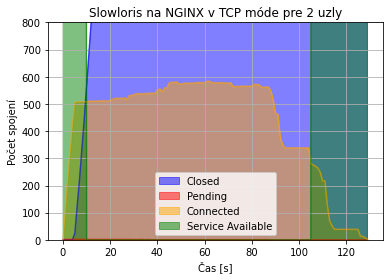

In [140]:
slowhttptest_graph('slowhttptest/nginx_tcp2roundrobin.csv', 'Slowloris na NGINX v TCP móde pre 2 uzly')